In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [38]:
df=pd.read_csv("DATA/Indian Liver Patient Dataset (ILPD).csv")

In [39]:
df.shape

(582, 11)

In [40]:
df.iloc[0]

65          62
Female    Male
0.7       10.9
0.1        5.5
187        699
16          64
18         100
6.8        7.5
3.3        3.2
0.9       0.74
1            1
Name: 0, dtype: object

# ADDING COLUMNS NAMES

In [41]:
df.columns=['Age','gender','total Bilirubin','direct Bilirubin','total proteins','albumin',' A/G ratio','SGPT','SGOT','Alkphos','Selector field']

In [42]:
df.head(5)

,Age,gender,total Bilirubin,direct Bilirubin,total proteins,albumin,A/G ratio,SGPT,SGOT,Alkphos,Selector field
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Exploratory Data Analysis

In [43]:
df.isnull().sum()

Age                 0
gender              0
total Bilirubin     0
direct Bilirubin    0
total proteins      0
albumin             0
 A/G ratio          0
SGPT                0
SGOT                0
Alkphos             4
Selector field      0
dtype: int64

In [44]:
df['Alkphos'].mean()

0.9471453287197237

In [45]:
df=df.fillna(0.94)

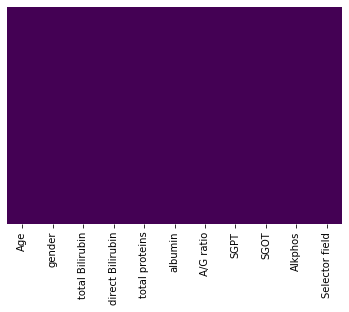

In [46]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No data is missing 

In [47]:
df.describe()
        

,Age,total Bilirubin,direct Bilirubin,total proteins,albumin,A/G ratio,SGPT,SGOT,Alkphos,Selector field
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947096,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.318760,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [48]:
corr=df[::][df.columns[:10]].corr()

Text(0.5, 1, 'Correlation matrix')

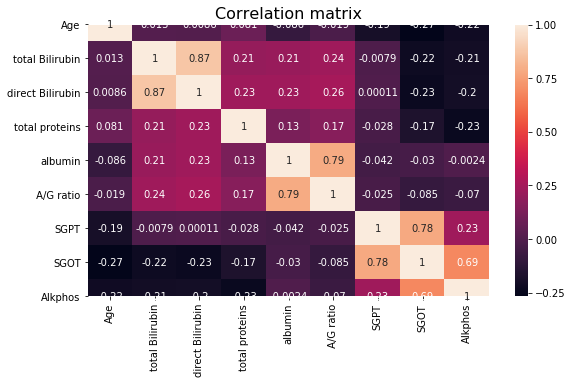

In [49]:
ax=plt.subplots(figsize=(9,5))
ax=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
ax.set_title('Correlation matrix', fontsize=16, fontdict={})

In [50]:
df['gender']=df['gender'].apply(lambda x:1 if x=='Male' else 0)

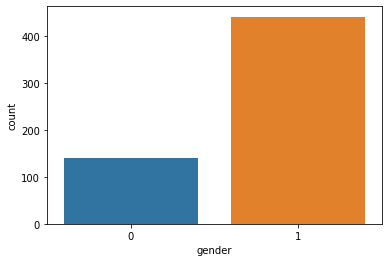

In [51]:
sns.countplot(x='gender',data=df)

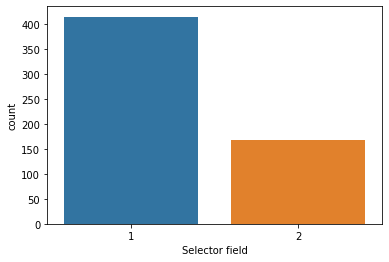

In [52]:
sns.countplot(x='Selector field',data=df)

# BUILDING SVM MODEL

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Selector field',axis=1), df['Selector field'], test_size=0.30, random_state=100)